# RNN. Actividad realizada por Angela Cristina Villate
UNIR - MIA, junio del 2024


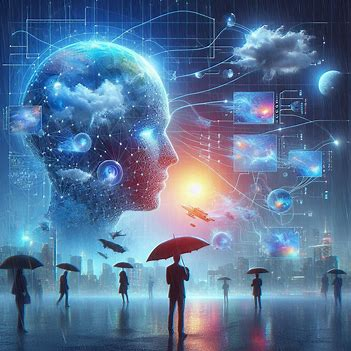

### Introducci√≥n

El prop√≥sito de este ejercicio es implementar la arquitectura de RNN (redes neuronales recurrentes) para analizar datos recolectados a lo largo del tiempo (series de tiempo). El dataset utilizado es "Daily - Min Temperatures", que contiene 3651 registros de temperatura desde enero de 1981 hasta diciembre de 1990. Las series de tiempo requieren la informaci√≥n de estados anteriores para predecir su comportamiento futuro. En este caso, el objetivo es entrenar un modelo de deep learning capaz de predecir la temperatura bas√°ndose en datos hist√≥ricos.

Para lograr este objetivo, se han desarrollado y comparado dos modelos de redes neuronales recurrentes.

No es un dato menor que el fen√≥meno a analizar sea el de la temperatura, el cual es un evento dif√≠cil de predecir con precisi√≥n debido a la gran cantidad de variables ambientales que influyen en ella. A diferencia de otras series de tiempo como la inflaci√≥n, los datos burs√°tiles o las series ling√º√≠sticas, la temperatura depende de factores m√∫ltiples y complejos. Por lo tanto, los datos hist√≥ricos por s√≠ solos no son suficientes; se necesita una comprensi√≥n m√°s amplia de los factores ambientales que terminan por impactarla.

As√≠, aunque las secuencias de datos puedan ser procesadas por el modelo, esta √∫nica entrada no garantiza predicciones precisas. Los modelos de predicci√≥n que requieren secuencias de datos con mucha informaci√≥n deben tratarse como series irregulares o fen√≥menos complejos en lugar de series regulares o fen√≥menos simples.

A continuaci√≥n, se presenta el proceso de trabajo y los resultados obtenidos de los modelos desarrollados, con una reflexi√≥n sobre el an√°lisis de los datos y sus implicaciones.

## 1. Carga y lectura de datos

Se siguieron casi todos los pasos de la gu√≠a, sin embargo debido a que l ejercicio fue desarrollado desde mi entorno personal de trabajo, fue necesario acudir a request para lograr descargar los datos en una ruta local

üñ•Ô∏èüñ•Ô∏èüñ•Ô∏èüñ•Ô∏è 


In [2]:
import numpy as np
import matplotlib.pyplot as plt
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

In [3]:
import requests

# URL del archivo que deseas descargar
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/daily-min-temperatures.csv"

# Ruta donde deseas guardar el archivo
file_path = "C:\\Users\\villa\\daily-min-temperatures.csv"

# Realizar la solicitud GET
response = requests.get(url)

# Verificar que la solicitud fue exitosa
if response.status_code == 200:
    # Abrir el archivo en modo de escritura binaria y guardar el contenido
    with open(file_path, 'wb') as file:
        file.write(response.content)
    print(f"Archivo guardado en {file_path}")
else:
    print(f"Error al descargar el archivo: {response.status_code}")

Archivo guardado en C:\Users\villa\daily-min-temperatures.csv


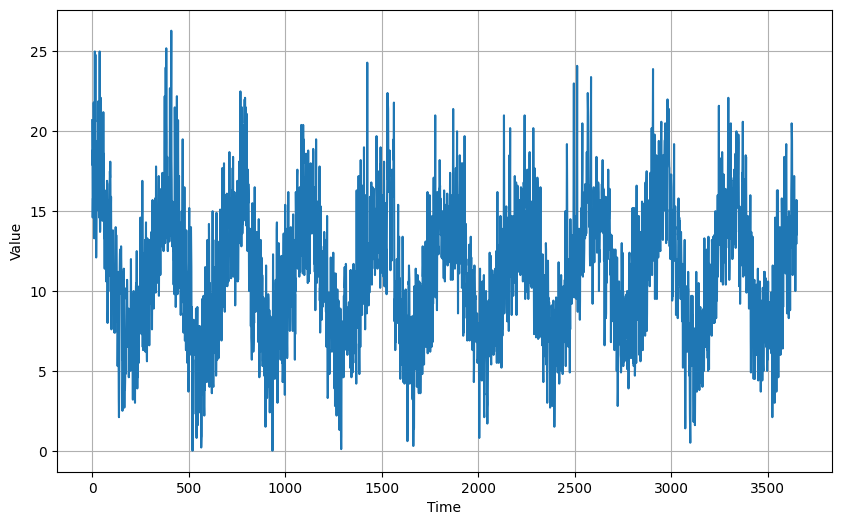

In [4]:

import csv
time_step = []
temps = []

with open("C:\\Users\\villa\\daily-min-temperatures.csv") as csvfile:
  reader = csv.reader(csvfile, delimiter=',')
  next(reader)
  step=0
  for row in reader:
    temps.append(float(row[1]))
    time_step.append(step)
    step = step + 1

series = np.array(temps)
time = np.array(time_step)
plt.figure(figsize=(10, 6))
plot_series(time, series)

üí°üí°üí°

### Interpretaci√≥n preeliminar del dataset

La gr√°fica muestra el comportamiento de la temperatura en una serie temporal. Es notorio que nos enfrentamos a datos que no son del todo regulares o cuya regularidad es dif√≠cil de determinar; sin embargo, para contar con una mayor caracterizaci√≥n de los datos se realizaron las visualizaciones que se presentan a continuaci√≥n.

üí°üí°üí°

In [6]:
import pandas as pd
# Leer el archivo CSV en un DataFrame de pandas
data = pd.read_csv(file_path, parse_dates=['Date'])

# Visualizar el DataFrame para verificar los datos
print(data.head())

# Extraer los valores necesarios
time_step = np.arange(len(data))  # Generar un array de pasos de tiempo
temps = data['Temp'].to_numpy()  # Convertir la columna de temperaturas a un array de numpy


        Date  Temp
0 1981-01-01  20.7
1 1981-01-02  17.9
2 1981-01-03  18.8
3 1981-01-04  14.6
4 1981-01-05  15.8


In [8]:
import pandas as pd
import numpy as np

df = pd.read_csv(file_path)

print("Primeros 15 datos:")
print(df.head(15))

print("\n√öltimos 15 datos:")
print(df.tail(15))

Primeros 15 datos:
          Date  Temp
0   1981-01-01  20.7
1   1981-01-02  17.9
2   1981-01-03  18.8
3   1981-01-04  14.6
4   1981-01-05  15.8
5   1981-01-06  15.8
6   1981-01-07  15.8
7   1981-01-08  17.4
8   1981-01-09  21.8
9   1981-01-10  20.0
10  1981-01-11  16.2
11  1981-01-12  13.3
12  1981-01-13  16.7
13  1981-01-14  21.5
14  1981-01-15  25.0

√öltimos 15 datos:
            Date  Temp
3635  1990-12-17  13.9
3636  1990-12-18  17.2
3637  1990-12-19  14.7
3638  1990-12-20  15.4
3639  1990-12-21  13.1
3640  1990-12-22  13.2
3641  1990-12-23  13.9
3642  1990-12-24  10.0
3643  1990-12-25  12.9
3644  1990-12-26  14.6
3645  1990-12-27  14.0
3646  1990-12-28  13.6
3647  1990-12-29  13.5
3648  1990-12-30  15.7
3649  1990-12-31  13.0


üõéÔ∏èüõéÔ∏èüõéÔ∏è

### ¬øEst√°n balanceados los datos?

En el siguiente paso, verificamos que hubiera la misma cantidad de datos para cada a√±o. De este modo, pudimos asegurarnos de que los datos estuvieran equilibrados al tomar el a√±o como unidad de an√°lisis.

Adem√°s, calculamos la media de la temperatura para cada a√±o. Estos datos indican que, al analizar la temperatura a√±o tras a√±o, ninguna serie se repite, aunque existen valores cercanos, como durante el periodo de 1986 y 1987. De esto se puede concluir que, para generar predicciones precisas sobre el clima, probablemente se necesiten series de tiempo mucho m√°s largas para poder establecer patrones de an√°lisis confiables.

üõéÔ∏èüõéÔ∏èüõéÔ∏è


In [9]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year

yearly_data = df.groupby('Year').agg(
    Avg_Temp=('Temp', 'mean'),
    Data_Count=('Temp', 'size')
).reset_index()

# Mostrar los datos agrupados por a√±o
print(yearly_data)

   Year   Avg_Temp  Data_Count
0  1981  11.517260         365
1  1982  10.783562         365
2  1983  11.187397         365
3  1984  10.591781         365
4  1985  11.137534         365
5  1986  10.803288         365
6  1987  10.853151         365
7  1988  11.972055         365
8  1989  11.261918         365
9  1990  11.669589         365


üìâüìâüìâ

### Gr√°fica de medias

A continuaci√≥n, se presentan gr√°ficamente las medias de la temperatura calculadas para cada a√±o.

üìâüìâüìâ

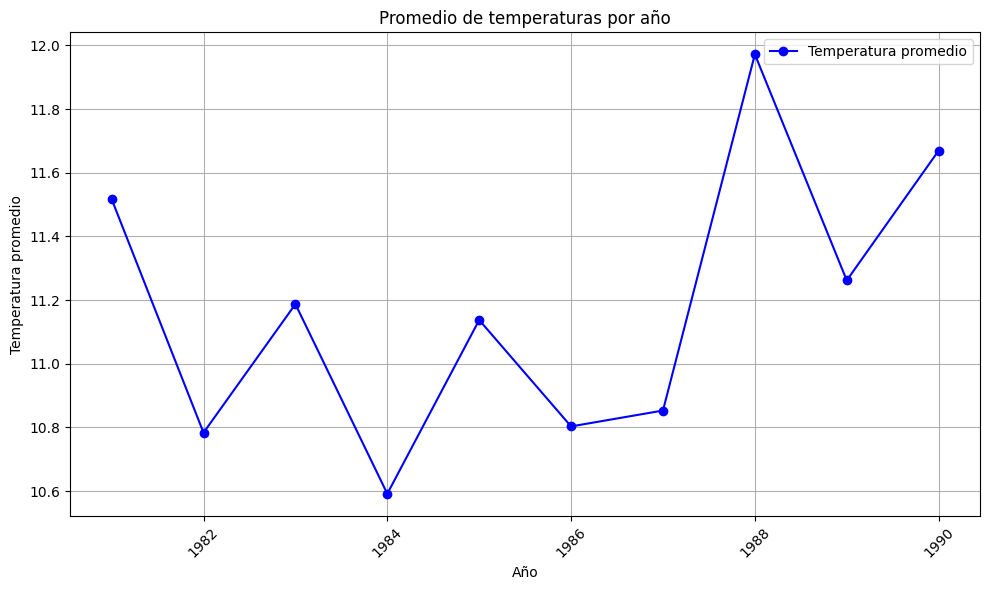

In [10]:
import matplotlib.pyplot as plt
# Graficar los datos
plt.figure(figsize=(10, 6))
plt.plot(yearly_data['Year'], yearly_data['Avg_Temp'], marker='o', linestyle='-', color='b', label='Temperatura promedio')
plt.title('Promedio de temperaturas por a√±o')
plt.xlabel('A√±o')
plt.ylabel('Temperatura promedio')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

## 2. Normalizaci√≥n de datos

En esta fase se realizaron tres procesos, a saber:
    
 üìâüìâ**Normalizaci√≥n de los datos:** Este proceso de escalado permite que todos los valores est√©n dentro del mismo rango, facilitando el an√°lisis y procesamiento por parte del modelo.
 
üìâüìâ**Creaci√≥n de ventanas de tiempo:** Dado que se analizan series de tiempo, los datos se han agrupado en secuencias de entrada y etiquetas para optimizar el rendimiento del modelo.
Agrupaci√≥n de secuencias de entrada: Cada secuencia se ha agrupado en intervalos de 30 d√≠as, proporcionando una medida mensual que permite capturar patrones temporales relevantes.

üìâüìâ**Visualizaci√≥n de las ventanas de tiempo:** para tener una mayor claridad sobre la forma en la que trabajan las ventanas de tiempo se ha generado una visualizaci√≥n que nos permita comprender las caracter√≠sticas de las cadenas de datos que recibir√° el modelo. La visualizaci√≥n de los datos por d√≠a, corrobora la observaci√≥n de que estamos frente a cadenas irregulares de informaci√≥n. 

In [15]:
import numpy as np

data['Temp normalizado'] = (data['Temp'] - np.min(data['Temp'])) / (np.max(data['Temp']) - np.min(data['Temp']))

In [19]:
data[['Date','Temp', 'Temp normalizado']].head()

Date  Temp  Temp normalizado
0 1981-01-01  20.7          0.787072
1 1981-01-02  17.9          0.680608
2 1981-01-03  18.8          0.714829
3 1981-01-04  14.6          0.555133
4 1981-01-05  15.8          0.600760

### Creaci√≥n de ventana

In [18]:
D = 30
normalizados = data['Temp normalizado'].values

X = []
Y = []
for i in range (D, len(normalizados)):
  X.append(normalizados[i-D:i])
  Y.append(normalizados[i])

X = np.array(X)
X = np.expand_dims(X, axis = 2)
Y = np.array(Y)

print(f'Tama√±o del conjunto de datos de entrada: {X.shape}')
print(f'Tama√±o del conjunto de etiquetas: {Y.shape}')

Tama√±o del conjunto de datos de entrada: (3620, 30, 1)
Tama√±o del conjunto de etiquetas: (3620,)


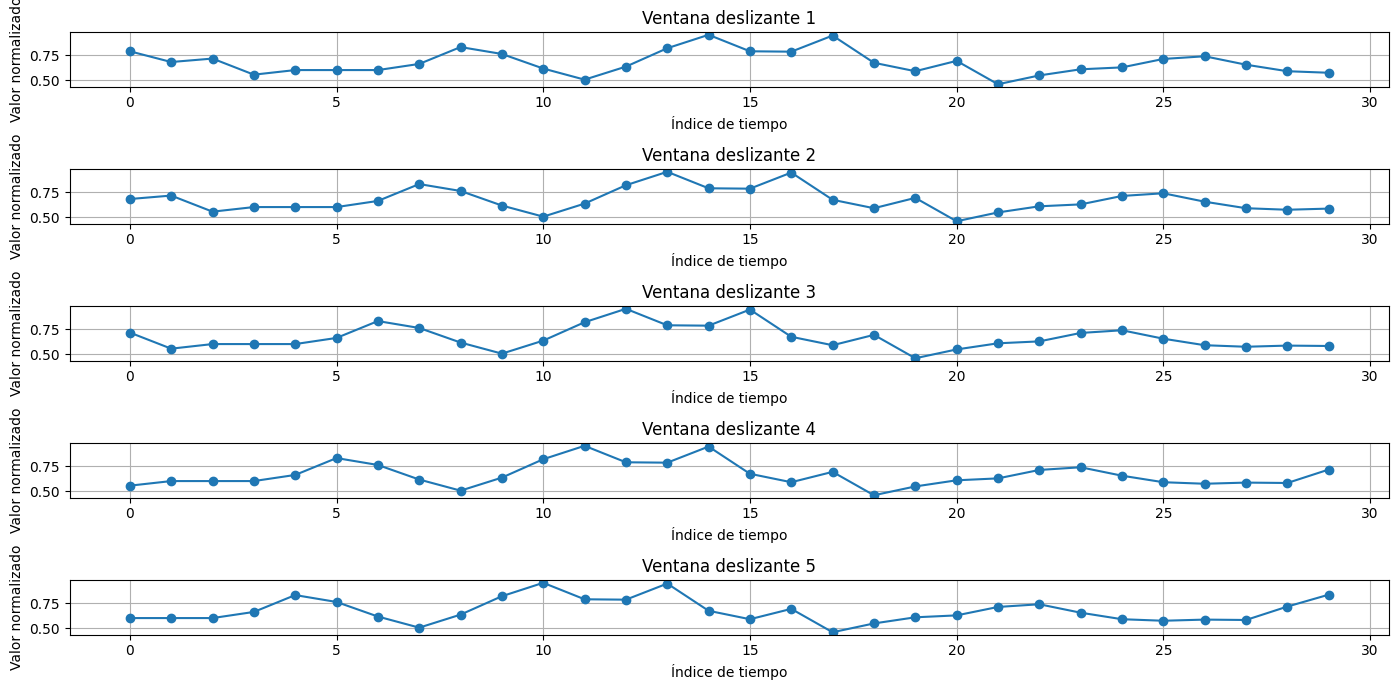

In [20]:
import matplotlib.pyplot as plt

# N√∫mero de ventanas a visualizar (por ejemplo, las primeras 5)
num_windows = 5

plt.figure(figsize=(14, 7))
for i in range(num_windows):
    plt.subplot(num_windows, 1, i+1)
    plt.plot(X[i], marker='o', linestyle='-')
    plt.title(f'Ventana deslizante {i+1}')
    plt.xlabel('√çndice de tiempo')
    plt.ylabel('Valor normalizado')
    plt.grid(True)

plt.tight_layout()
plt.show()

Dificilmente se puede establecer una corrrelaci√≥n temporal con la temperatura ... 

‚ö†Ô∏è‚ö†Ô∏è‚ö†Ô∏è Profesor, pregunta

**¬øEsto puede entenderse c√≥mo un fen√≥meno atravesado por la aleatoriedad o pseudoaleatoiredad?**

In [52]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

## 3. Dise√±o del modelo, entrenamiento y prueba

In [65]:
# Define tu modelo exactamente como lo ten√≠as
def build_model():
    model = tf.keras.Sequential([
        tf.keras.layers.Conv1D(filters=32, kernel_size=5, strides=1, padding='causal', activation='relu', input_shape=[None, 1]),
        tf.keras.layers.LSTM(64, return_sequences=True),
        tf.keras.layers.LSTM(64, return_sequences=True),
        tf.keras.layers.Dense(30, activation='relu'),
        tf.keras.layers.Dense(10, activation='relu'),
        tf.keras.layers.Dense(1),
        tf.keras.layers.Lambda(lambda x: x * 400)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

In [71]:
# Funci√≥n para entrenar el modelo
def train_model(model, X_train, Y_train, epochs=90, batch_size=32):
    history = model.fit(X_train, Y_train, epochs=epochs, batch_size=batch_size, verbose=1, validation_split=0.2)
    return history.history  # Devolver el historial como un diccionario

In [72]:
# Funci√≥n predict_model sin cambios
def predict_model(model, X_test):
    predictions = model.predict(X_test)
    return predictions

### Explicaci√≥n de la arquitectura del modelo

Se han generado tres tipos de funciones para diferenciar cada una de las fases de la arquitectura, de esta forma se invocan al momento de compilarlo. Como se puede observar las fucniones son las de creaci√≥n, entrenamiento y prueba del modelo. La arquitectura del modelo sigue las indicaciones de la gu√≠a.

Algunas de las ventajas del modelo se pueden enumerar a continuaci√≥n:

* Combinaci√≥n de Convolucionales y LSTM: entiendo que la combinaci√≥n de la convolucional y la LSTM en paralelo ayudan a distribuir las tareas del modelo. Mientras que la primera se encarga de encontrar los patrones en las series temporales, la segunda almacena los datos.

* Hiperpar√°metros para el an√°lisis de informaci√≥n en series: strides=1, determinan cu√°ntas unidades se desplaza el filtro a lo largo de la entrada, es decir, el filtro se mueve una unidad a la vez y esto permite que se analicen cada una de los datos de la serie. El padding, por su parte, permite que solo se analicen los datos del pasado.



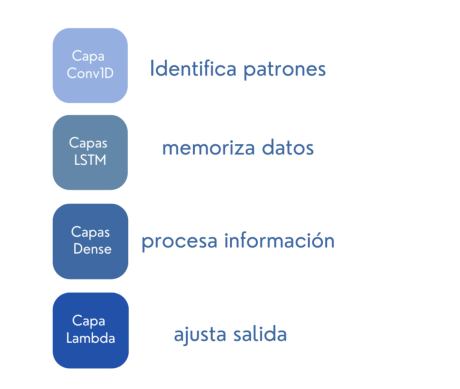

In [12]:
import matplotlib.pyplot as plt
from matplotlib.image import imread

# Ruta del archivo PNG (aj√∫stala seg√∫n la ubicaci√≥n de tu archivo)
#file_path = 'C:/Users/villa/Downloads/Dime, qu√© se siente haber le√≠do un laudo m√°s extenso al que te asignaron (37).png'

# Cargar la imagen
#img = imread(file_path)

# Mostrar la imagen
#plt.imshow(img)
#plt.axis('off')  # Ocultar ejes
#plt.show()

### Creaci√≥n y prueba del modelo

In [73]:
# Crear el modelo y entrenarlo
model = build_model()
history = train_model(model, X_train, Y_train, epochs=90, batch_size=32)

Epoch 1/90
73/73 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 5s 21ms/step - loss: 1.8910 - val_loss: 0.0252
Epoch 2/90
73/73 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 49ms/step - loss: 0.0246 - val_loss: 0.0249
Epoch 3/90
73/73 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 51ms/step - loss: 0.0235 - val_loss: 0.0246
Epoch 4/90
73/73 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 39ms/step - loss: 0.0231 - val_loss: 0.0247
Epoch 5/90
73/73 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 48ms/step - loss: 0.0235 - val_loss: 0.0264
Epoch 6/90
73/73 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 44ms/step - loss: 0.0237 - val_loss: 0.0246
Epoch 7/90
73/73 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 3s 47ms/step - loss: 0.0220 - val_loss: 0.0246
Epoch 8/90
73/73 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 4s 51ms/step - loss: 0.0251 - val_loss: 0.0253


In [69]:
# Realizar predicciones
predictions = predict_model(model, X_test)
print(predictions)

23/23 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 1s 18ms/step
[[[0.49546567]
  [0.49546567]
  [0.49546567]
  ...
  [0.49546567]
  [0.49546567]
  [0.49546567]]

 [[0.49546567]
  [0.49546567]
  [0.49546567]
  ...
  [0.49546567]
  [0.49546567]
  [0.49546567]]

 [[0.49546567]
  [0.49546567]
  [0.49546567]
  ...
  [0.49546567]
  [0.49546567]
  [0.49546567]]

 ...

 [[0.49546567]
  [0.49546567]
  [0.49546567]
  ...
  [0.49546567]
  [0.49546567]
  [0.49546567]]

 [[0.49546567]
  [0.49546567]
  [0.49546567]
  ...
  [0.49546567]
  [0.49546567]
  [0.49546567]]

 [[0.49546567]
  [0.49546567]
  [0.49546567]
  ...
  [0.49546567]
  [0.49546567]
  [0.49546567]]]


## 4. Gr√°ficas y an√°lisis 

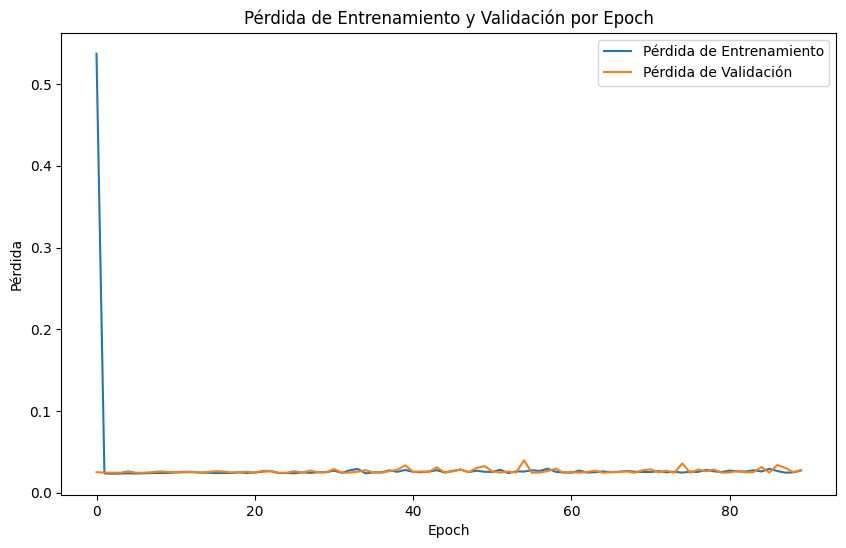

In [74]:
# Graficar p√©rdida de entrenamiento y validaci√≥n por epoch
plt.figure(figsize=(10, 6))
plt.plot(history['loss'], label='P√©rdida de Entrenamiento')
plt.plot(history['val_loss'], label='P√©rdida de Validaci√≥n')
plt.legend()
plt.title('P√©rdida de Entrenamiento y Validaci√≥n por Epoch')
plt.xlabel('Epoch')
plt.ylabel('P√©rdida')
plt.show()

### ¬øQu√© tan r√°pido aprendi√≥ el modelo?

La gr√°fica compara las m√©tricas de p√©rdida entre el entrenamiento y la prueba. Desde la primera √©poca, se observa que el modelo aprende r√°pidamente y alcanza una estabilizaci√≥n hasta aproximadamente la √©poca 40. Despu√©s de este punto, se nota un leve aumento en la p√©rdida del conjunto de prueba, indicando cierta fluctuaci√≥n en el rendimiento del modelo, pero no lo bastante  como para sugerir un sobreajuste de los datos.

En este punto, decid√≠ realizar un modelo alternativo con otra arquitectura de RNN debido a que el comportamiento de estos datos no me deja del todo satisfecha. En el notebook se presentan el dise√±o, ejecuci√≥n y an√°lisis de la segunda RNN.



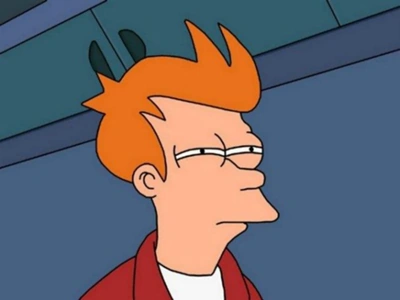

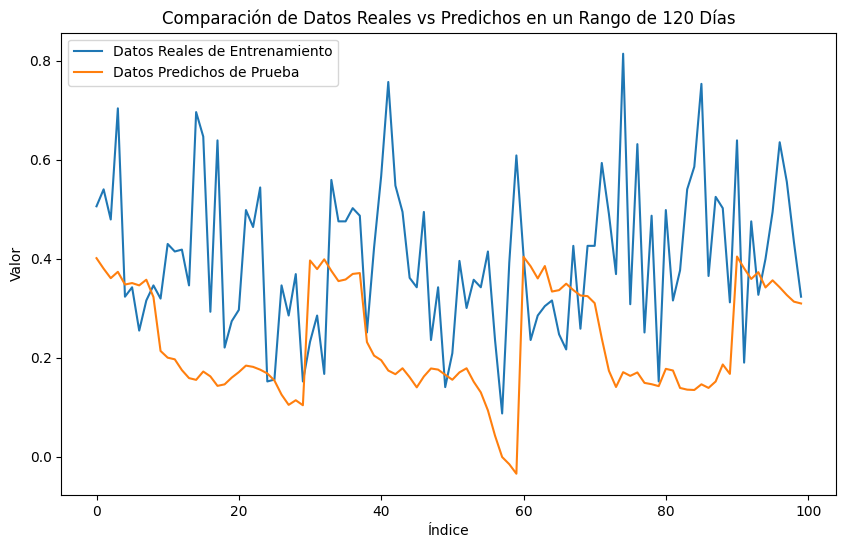

In [81]:
# Suponemos que Y_train y predictions tienen suficientes datos
rango_dias = 120
Y_train_120 = Y_train.flatten()[:rango_dias]
predictions_120 = predictions.flatten()[:rango_dias]

# Graficar datos reales vs datos predichos
plt.figure(figsize=(10, 6))
plt.plot(Y_train_100, label='Datos Reales de Entrenamiento')
plt.plot(predictions_100, label='Datos Predichos de Prueba')
plt.legend()
plt.title('Comparaci√≥n de Datos Reales vs Predichos en un Rango de 120 D√≠as')
plt.xlabel('√çndice')
plt.ylabel('Valor')
plt.show()

‚ö†Ô∏è‚ö†Ô∏è‚ö†Ô∏è

Al graficar los resultados de los valores reales frente a los valores predichos, se observa un rendimiento deficiente del modelo. Esto puede explicarse por las siguientes razones:

* Tesis 1: Es probable que no haya implementado correctamente la arquitectura de la red neuronal, lo que llev√≥ al fracaso del modelo.

* Tesis 2: Se confirma la complejidad inherente de los datos de temperatura, dificultando el an√°lisis de sus recurrencias y la identificaci√≥n de patrones significativos para generar predicciones precisas.

* Tesis 3: Ajustar el n√∫mero de √©pocas podr√≠a mejorar el modelo; considerar el uso de early stopping podr√≠a ser beneficioso para optimizar la t√©cnica.

* Tesis 4: En este tipo de datos, una aproximaci√≥n en lugar de una predicci√≥n exacta podr√≠a ser suficiente. Estos modelos podr√≠an trabajar con una alta tolerancia al error, adapt√°ndose mejor a la naturaleza variable de los datos de temperatura.
‚ö†Ô∏è‚ö†Ô∏è‚ö†Ô∏è